# Pymaceuticals
---

#### Analysis

* Ramicane treatment is the most promising, as the final tumor volume is the lowest of all treatment regimens having a median of Tumor Volume of 34.8486
* 50.7 % of the mice on this study are male
* According to Mouse weight vs Avg Tumor Volume for Capomulin regimen the mouse weight tends to increase as the Tumor volume is greater
* The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.95, wich means that there is a Strong correlation between both factors

### Observations and Insights
---

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import sem

#Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
#mouse_metadata preview
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#study_results preview
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#Combine the data into a single dataset
mouse_data = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [5]:
mouse_data.shape

(1893, 8)

In [6]:
#Checking the number of mice in the DataFrame
len(mouse_data["Mouse ID"].unique())

249

In [7]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_data.loc[mouse_data[["Mouse ID", "Timepoint"]].duplicated(),"Mouse ID"].unique()
pd.DataFrame({"Duplicate mice ID": duplicate_mice})

,Duplicate mice ID
0,g989


In [8]:
#Optional: Get all the data for the duplicate mouse ID. 
mouse_data.loc[mouse_data[["Mouse ID", "Timepoint"]].duplicated()]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [9]:
#Create a clean DataFrame by droping the duplicate mouse by its ID
mice_data = mouse_data.drop_duplicates(subset = ["Mouse ID", "Timepoint"])
mice_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
mice_data.shape

(1888, 8)

In [12]:
#Checking the number of mice in the clean DataFrame.
len(mice_data["Mouse ID"].unique())

249

### Summary Statistics
---

In [13]:
drug_regimens = mice_data["Drug Regimen"].unique()

In [14]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = []
medians = []
variances = []
std_deviations = []
SEMs = []
tumor_data = mice_data.rename(columns={"Tumor Volume (mm3)": "Tumor_volume"})

for treatment in drug_regimens:
    drug_df = tumor_data.loc[tumor_data["Drug Regimen"]==treatment]
    means.append(round(np.mean(drug_df["Tumor_volume"]),2))
    medians.append(round(np.median(drug_df["Tumor_volume"]),2))
    variances.append(round(np.var(drug_df["Tumor_volume"],ddof=0),2))
    std_deviations.append(round(np.std(drug_df["Tumor_volume"],ddof=0),2))
    sample = tumor_data.sample(100)
    SEMs.append(round(sem(sample.Tumor_volume),2))

pd.DataFrame({
    "Drug Regimen": drug_regimens,
    "Mean": means,
    "Median": medians,
    "Variance": variances,
    "Std Deviation": std_deviations,
    "SEM": SEMs
}).set_index("Drug Regimen")
#This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.84,4.98,0.92
Ketapril,55.24,53.70,68.19,8.26,0.80
Naftisol,54.33,52.51,65.82,8.11,0.76
Infubinol,52.88,51.82,42.89,6.55,0.91
Stelasyn,54.23,52.43,59.12,7.69,0.96
Ramicane,40.22,40.67,23.38,4.84,0.85
Propriva,52.39,50.91,42.86,6.55,0.93
Zoniferol,53.24,51.82,48.27,6.95,0.98
Placebo,54.03,52.29,60.83,7.80,0.97


###  Bar Plots
---

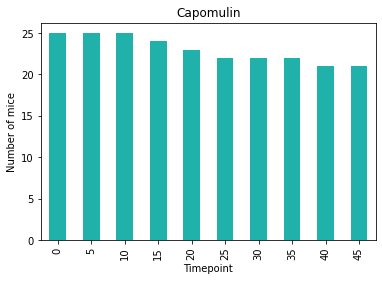

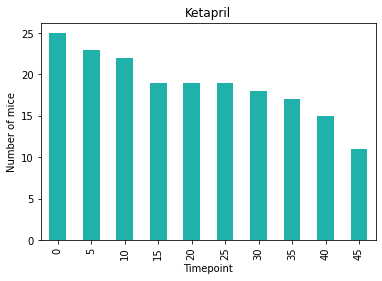

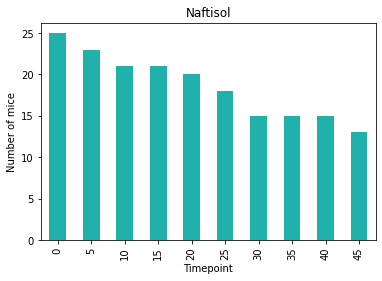

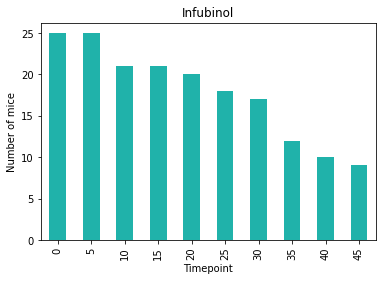

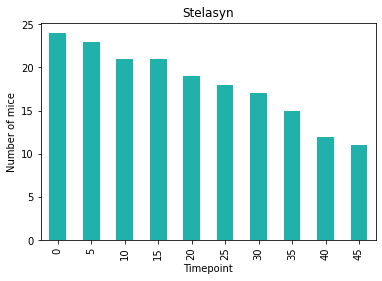

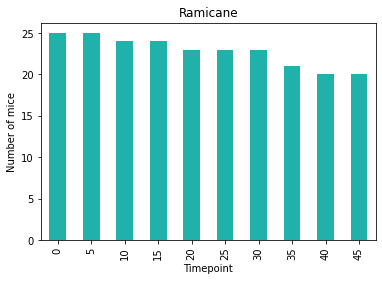

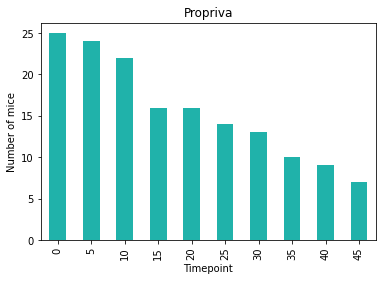

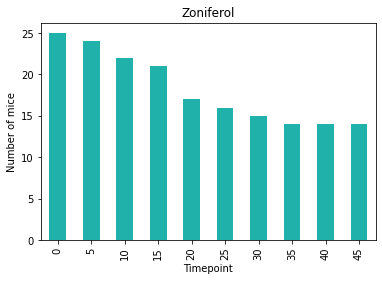

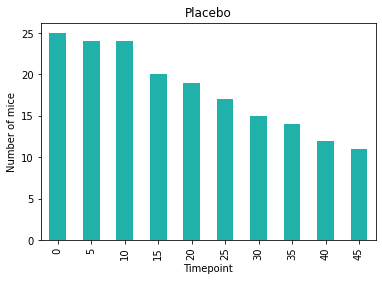

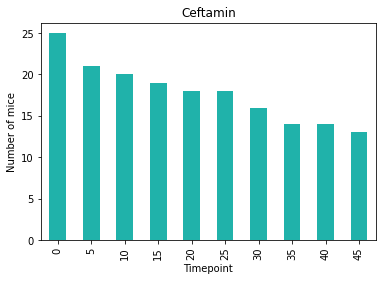

In [15]:
#Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
for treatment in drug_regimens:
    drug_df = mice_data.loc[mice_data["Drug Regimen"]==treatment]
    drug_df = drug_df[["Mouse ID", "Timepoint"]]
    drug_df = pd.DataFrame(drug_df.groupby(["Timepoint"])["Mouse ID"].count())
    drug_df = drug_df.rename(columns={"Mouse ID": "Number of mice"})
    drug_df.plot(kind="bar", facecolor = "lightseagreen", legend=False)
    plt.title(treatment)
    plt.xlabel("Timepoint")
    plt.ylabel("Number of mice")
    plt.show()
    

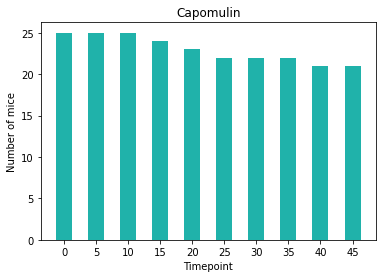

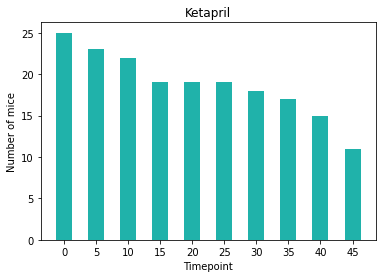

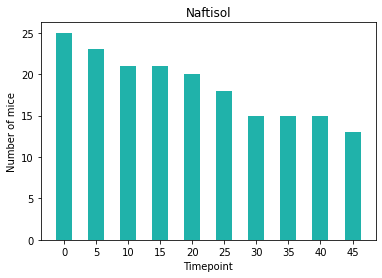

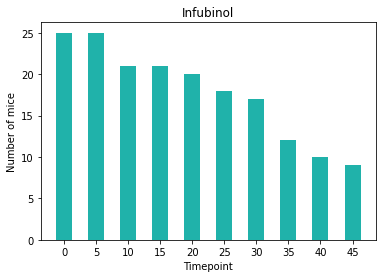

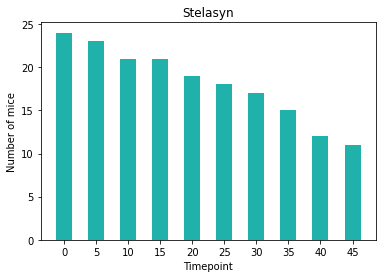

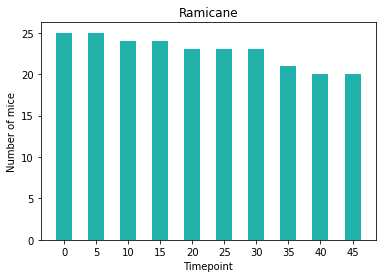

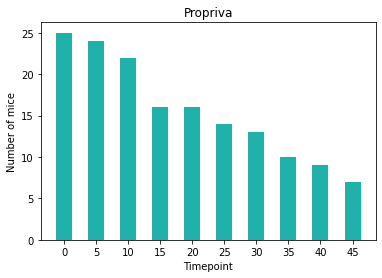

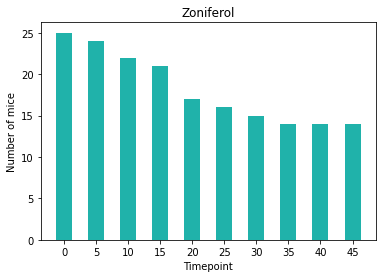

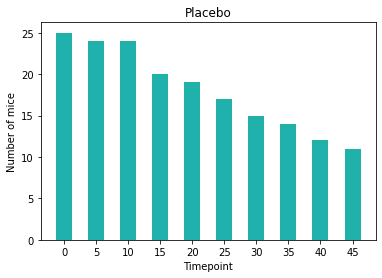

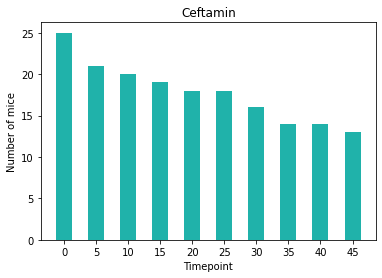

In [16]:
#Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
for treatment in drug_regimens:
    drug_df = mice_data.loc[mice_data["Drug Regimen"]==treatment]
    drug_df = drug_df[["Mouse ID", "Timepoint"]]
    drug_df = pd.DataFrame(drug_df.groupby(["Timepoint"])["Mouse ID"].count())
    drug_df = drug_df.rename(columns={"Mouse ID": "Number of mice"}).reset_index()
    plt.bar(x=drug_df["Timepoint"], height=drug_df["Number of mice"], color="lightseagreen", align="center", width= 2.5)
    plt.xticks(drug_df["Timepoint"])
    plt.title(treatment)
    plt.xlabel("Timepoint")
    plt.ylabel("Number of mice")
    plt.show()

### Pie Plots
---

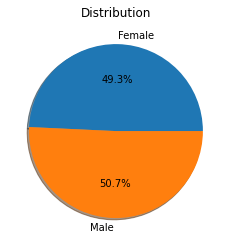

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = mice_data.rename(columns={"Mouse ID": "Distribution"})
sex_group = sex_group.groupby(["Sex"])["Distribution"].count()
sex_group.plot(kind="pie", y="Sex", autopct='%1.1f%%', shadow = True, ylabel = "", title = "Distribution")
plt.show()

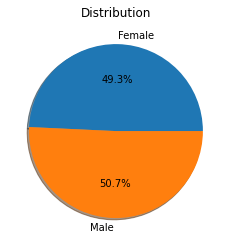

In [18]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_group = mice_data.rename(columns={"Mouse ID": "Distribution"})
sex_group = pd.DataFrame(sex_group.groupby(["Sex"])["Distribution"].count()).reset_index()
plt.pie(sex_group["Distribution"], labels = sex_group["Sex"], autopct='%1.1f%%', shadow = True)
plt.title("Distribution")
plt.show()

### Quartiles, Outliers and Boxplots
---

In [29]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin 
promising_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_volume_treatment = []

for treatment in promising_treatments:
    final_tumor_df = mice_data.loc[mice_data["Timepoint"]==45]
    final_tumor_df = final_tumor_df.loc[final_tumor_df["Drug Regimen"] == treatment]
    final_volume = final_tumor_df["Tumor Volume (mm3)"]
    final_volume_treatment.append(final_volume)
    
    #Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f""" For treatment {treatment}:
    The lower quartile of Tumor Volume is: {round(lowerq,4)}
    The upper quartile of Tumor Volume is: {round(upperq,4)}
    The interquartile range of Tumor Volume is: {round(iqr,4)}
    The the median of Tumor Volume is: {round(quartiles[0.5],4)}
    Values below {round(lower_bound,4)} or above {round(upper_bound,4)} could be outliers
    """)

 For treatment Capomulin:
    The lower quartile of Tumor Volume is: 32.3774
    The upper quartile of Tumor Volume is: 40.1592
    The interquartile range of Tumor Volume is: 7.7819
    The the median of Tumor Volume is: 37.3118
    Values below 20.7046 or above 51.832 could be outliers
    
 For treatment Ramicane:
    The lower quartile of Tumor Volume is: 30.9812
    The upper quartile of Tumor Volume is: 38.5083
    The interquartile range of Tumor Volume is: 7.5271
    The the median of Tumor Volume is: 34.8486
    Values below 19.6905 or above 49.799 could be outliers
    
 For treatment Infubinol:
    The lower quartile of Tumor Volume is: 62.7545
    The upper quartile of Tumor Volume is: 67.6856
    The interquartile range of Tumor Volume is: 4.9311
    The the median of Tumor Volume is: 66.0831
    Values below 55.3578 or above 75.0822 could be outliers
    
 For treatment Ceftamin:
    The lower quartile of Tumor Volume is: 61.4339
    The upper quartile of Tumor Volume is:

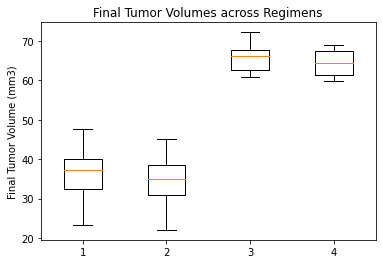

In [20]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volumes across Regimens")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(final_volume_treatment)
plt.show()
#Plot in this order: Capomulin, Ramicane, Infubinol, and Ceftamin 

###  Line and Scatter Plots
---

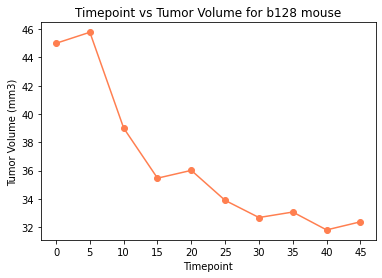

In [36]:
#Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_treatment = mice_data.loc[mice_data["Drug Regimen"]=="Capomulin"]
capomulin_treatment = capomulin_treatment.loc[capomulin_treatment["Mouse ID"]=="r554"]
plt.plot(capomulin_treatment["Timepoint"], capomulin_treatment["Tumor Volume (mm3)"], color = "coral", marker='o')
plt.title("Timepoint vs Tumor Volume for b128 mouse")
plt.xticks(capomulin_treatment["Timepoint"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

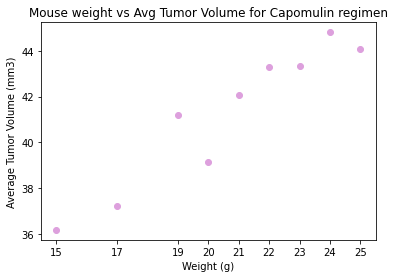

In [25]:
#Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_regimen = mice_data.loc[mice_data["Drug Regimen"]=="Capomulin"]
capomulin_regimen = pd.DataFrame(capomulin_regimen.groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
capomulin_regimen = capomulin_regimen.rename(columns={"Tumor Volume (mm3)": "Tumor Volume (Avg)"})
plt.scatter(capomulin_regimen["Weight (g)"], capomulin_regimen["Tumor Volume (Avg)"], color = "plum")
plt.title("r554r554")
plt.xticks(capomulin_regimen["Weight (g)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

### Correlation and Regression
---

The correlation between both factors is 0.95


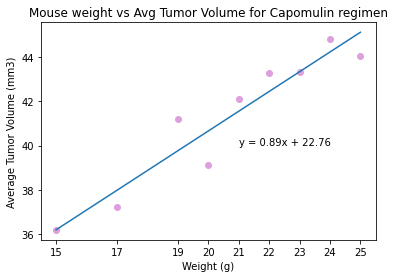

In [40]:
#Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_regimen["Weight (g)"], capomulin_regimen["Tumor Volume (Avg)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

#Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_regimen["Weight (g)"]
y_values = capomulin_regimen["Tumor Volume (Avg)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
predict = slope * x_values + intercept
capomulin_regimen["Predict"] = predict

#Plot
plt.scatter(capomulin_regimen["Weight (g)"], capomulin_regimen["Tumor Volume (Avg)"], color = "plum")
plt.plot(x_values, capomulin_regimen["Predict"])
plt.title("Mouse weight vs Avg Tumor Volume for Capomulin regimen")
plt.xticks(capomulin_regimen["Weight (g)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq, (21,40))
plt.show()